<a href="https://colab.research.google.com/github/MuhammedAshraf2020/ImageColorization/blob/main/ImageColoization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!mkdir "data" 

In [ ]:
!cp -avr /content/drive/MyDrive/images1024x1024/02000 /content/data

In [4]:
from processing import * 
from decodingModel import * 

In [5]:
feature_extract_model = VggModel()
colorize = model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [6]:
colorize.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 7, 7, 512)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 7, 7, 128)         589952    
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        73792     
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 56, 56, 32)        0     

In [7]:
PrepareData(datapath = "/content/data" , save_file = "/content/processed/" , 
			target_size = (224 , 224) , batch_size = 3000 , feature_extract_model = feature_extract_model)

Found 3000 images belonging to 3 classes.


100%|██████████| 3000/3000 [02:53<00:00, 17.30it/s]


 1/60 [..............................] - ETA: 2s - loss: 0.0043 - accuracy: 0.6806

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


60/60 [==============================] - 4s 72ms/step - loss: 0.0045 - accuracy: 0.6535
Found 5 images belonging to 2 classes.


100%|██████████| 5/5 [00:00<00:00,  8.26it/s]


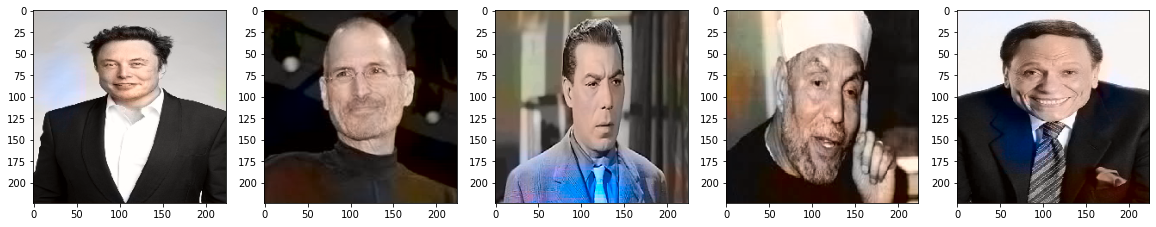

In [13]:
training_dir = "/content/processed"
num_train_samples = 3000
batch_size = 50
steps_per_epoch = np.floor(num_train_samples/batch_size)
epochs = 1

for i in range(epochs):
  generator = data_generator_baseline(training_dir, num_train_samples, batch_size)
  fit_history = colorize.fit_generator(generator, epochs = 1 , steps_per_epoch=steps_per_epoch, verbose=1)
  if i % 2 == 0:
    X = test_images(path = "/content/oldes" , shape = (224 , 224) , batch_size = 5 ,
                 feature_extract_model = feature_extract_model , model = colorize )
    show_images(X , width = 20 , hight = 18 , columns = 5 , rows = 1)
colorize.save('model_merge' + '.h5')

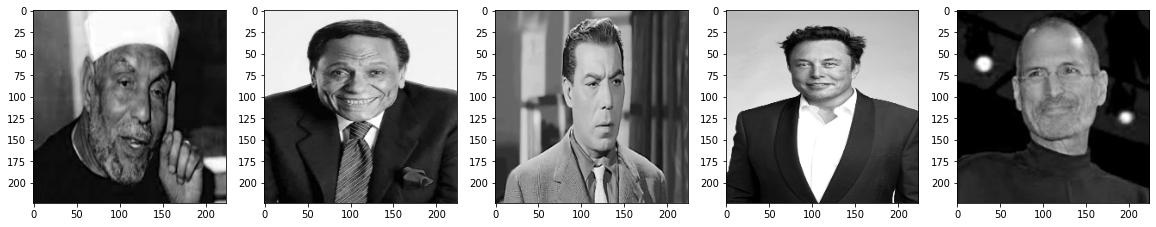

In [16]:
import cv2
from tqdm import tqdm 
path = "/content/oldes/uploads"
X2 = []
for img in os.listdir(path)[0:5]:
  X2.append(cv2.resize(cv2.imread(path + "/" + img) , (224 , 224))[: , : , 0])
fig = plt.figure(figsize=( 20 , 18))
for i in range(1 , 5 +1):
    img = X2[i-1]
    fig.add_subplot(1, 5 , i)
    plt.imshow(img , "gray")
plt.show()